About Dataset
Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats


In [2]:
df=pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


# Exploratory data analysis

# 1-Lets check the number of rows and columns in dataset 

In [4]:
df.shape

(36275, 19)

# 2-Null Value Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# Here No Null values are present

# 3-Lets check the variance of the independent features

In [6]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

# Booking_id is unique for every person hence gives no menaingful insights hence can drop this column

In [7]:
df.drop(columns=['Booking_ID'],inplace=True)

# Lets check the Visualisations with respect to taraget column "booking_status"

# Count plot analysis of independent feature type_of_meal_plan

average price for cancellation and non cancellation are almost same but this feature has lots of outliers

Text(0.5, 1.0, 'Meal Plan Distribution')

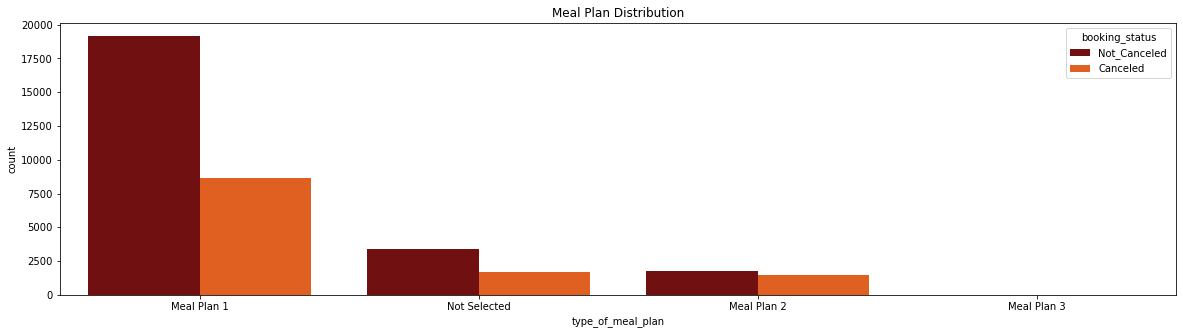

In [8]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="type_of_meal_plan", hue="booking_status", data=df, palette="gist_heat")
plt.title("Meal Plan Distribution")

Mostly people prefer meal plan 1 if they dont cancel their booking

here we see that Meal plan 3 contribution is nearly zero hence this row can be dropped

In [9]:
df['type_of_meal_plan'].replace('Meal Plan 3',np.nan,inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='type_of_meal_plan',inplace=True)

In [10]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Name: type_of_meal_plan, dtype: int64

In [11]:
df.shape

(36270, 18)

# Count plot analysis of independent feature market segment type

Text(0.5, 1.0, 'Market Segment Distribution')

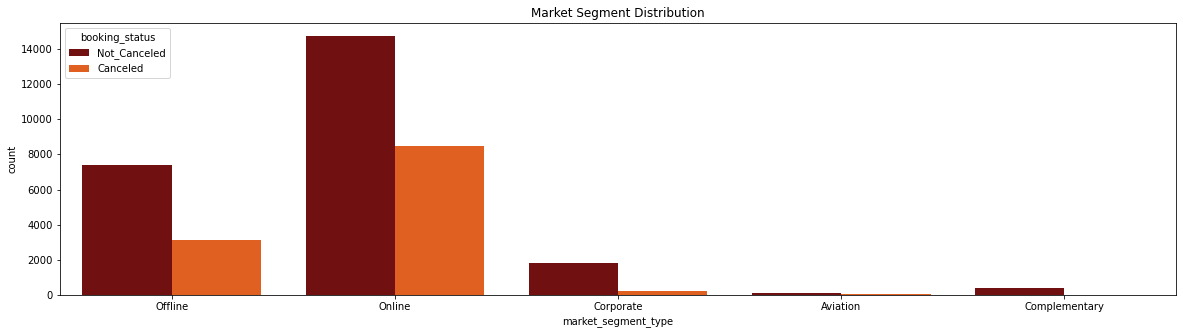

In [12]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="market_segment_type", hue="booking_status", data=df, palette="gist_heat")
plt.title("Market Segment Distribution")

In [13]:
df['market_segment_type'].replace(['Corporate','Aviation','Complementary'],[np.nan,np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='market_segment_type',inplace=True)

In [14]:
df['market_segment_type'].value_counts()

Online     23214
Offline    10527
Name: market_segment_type, dtype: int64

In [15]:
df.shape

(33741, 18)

# Count plot analysis of independent feature room_type_reserved

The Maximum data of booking cancelled and not cancelled is obtained from online booking and offline booking and hence rest are outliers

Text(0.5, 1.0, 'room_type_reserved')

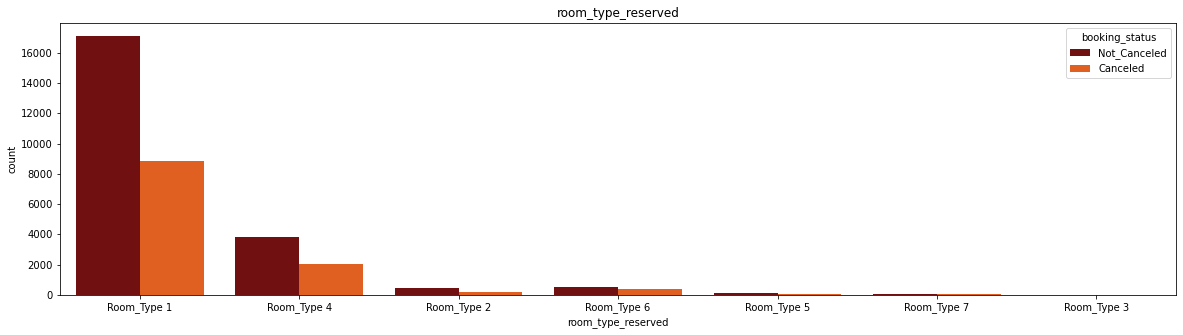

In [16]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="room_type_reserved", hue="booking_status", data=df, palette="gist_heat")
plt.title("room_type_reserved")

In [17]:
round(((df['room_type_reserved'].value_counts())/len(df))*100,2)

Room_Type 1    77.02
Room_Type 4    17.31
Room_Type 6     2.81
Room_Type 2     1.99
Room_Type 5     0.52
Room_Type 7     0.34
Room_Type 3     0.01
Name: room_type_reserved, dtype: float64

The visualisation and percentage of contribution tells us that Room_type_5,Room_type_7,Room_type_3 contribution is nearly equal to zero hence will drop these rows

The maximum booking belongs to Room_Type_1 and sometimes customers also prefer Room_type_4 

In [18]:
df['room_type_reserved'].value_counts()

Room_Type 1    25989
Room_Type 4     5841
Room_Type 6      949
Room_Type 2      670
Room_Type 5      174
Room_Type 7      114
Room_Type 3        4
Name: room_type_reserved, dtype: int64

In [19]:
df['room_type_reserved'].replace(['Room_Type 6','Room_Type 2','Room_Type 5','Room_Type 7','Room_Type 3'],[np.nan,np.nan,np.nan,np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='room_type_reserved',inplace=True)

In [20]:
df.shape

(31830, 18)

# Count plot analysis of independent feature repeated_guests

Text(0.5, 1.0, 'repeated_guest')

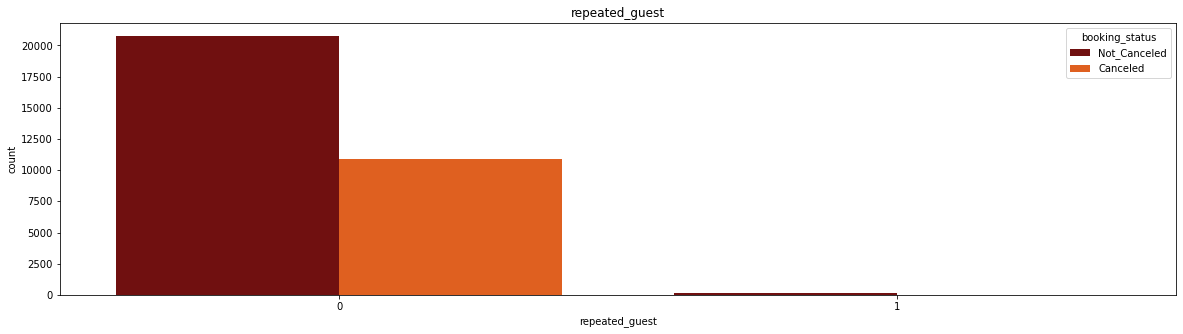

In [21]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="repeated_guest", hue="booking_status", data=df, palette="gist_heat")
plt.title("repeated_guest")

lets check these values in percentage

In [22]:
round(((df['repeated_guest'].value_counts())/len(df))*100,2)

0    99.43
1     0.57
Name: repeated_guest, dtype: float64

In [23]:
df.drop(columns=['repeated_guest'],inplace=True)

In [24]:
df.shape

(31830, 17)

Since 97% of value belongs to category 0 this feature has nearly zero variance hence will drop this feature

# Count plot analysis of independent feature no_of_adults

Text(0.5, 1.0, 'no_of_adults')

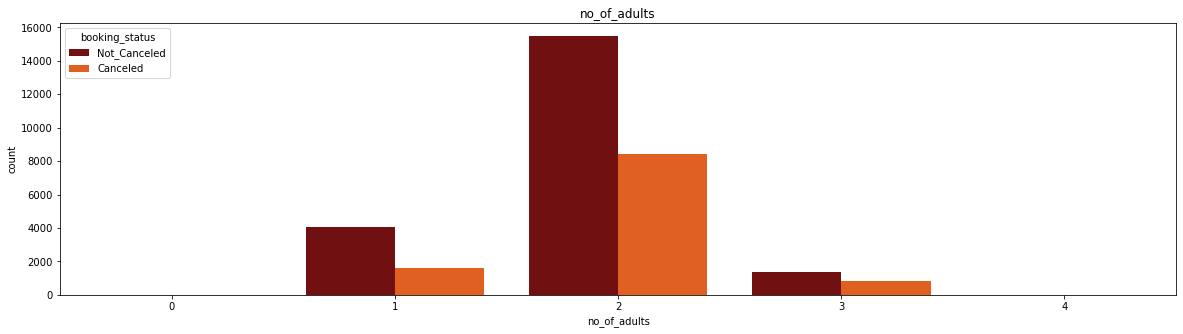

In [25]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_adults", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_adults")

In [26]:
round(((df['no_of_adults'].value_counts())/len(df))*100,2)

2    75.13
1    17.93
3     6.93
0     0.01
4     0.00
Name: no_of_adults, dtype: float64

In [27]:
df['no_of_adults'].replace([0,4],[np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='no_of_adults',inplace=True)

In [28]:
df.shape

(31827, 17)

In [29]:
df['no_of_adults'].value_counts()

2.0    23915
1.0     5706
3.0     2206
Name: no_of_adults, dtype: int64

# Count plot analysis of independent feature no_of_children

Text(0.5, 1.0, 'no_of_children')

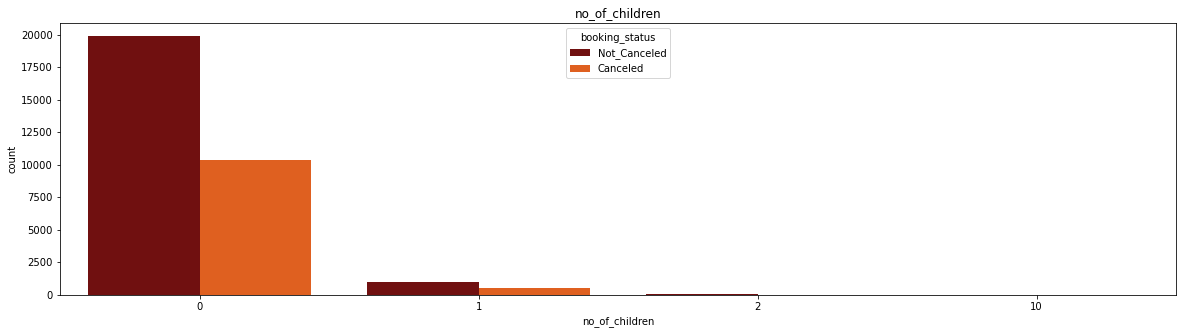

In [30]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_children", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_children")

In [31]:
round(((df['no_of_children'].value_counts())/len(df))*100,2)

0     95.19
1      4.67
2      0.14
10     0.00
Name: no_of_children, dtype: float64

In [32]:
df['no_of_children'].replace([10],[np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='no_of_children',inplace=True)

In [33]:
df['no_of_children'].value_counts()

0.0    30296
1.0     1485
2.0       45
Name: no_of_children, dtype: int64

In [34]:
df.shape

(31826, 17)

# Count plot analysis of independent feature no_of_weekend_nights

Text(0.5, 1.0, 'no_of_weekend_nights')

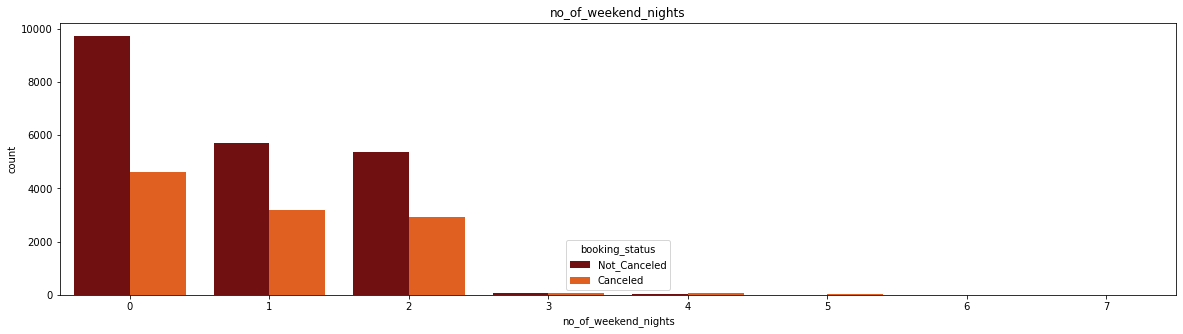

In [35]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_weekend_nights", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_weekend_nights")

here no of weekend_nights beyond 2 are outliers lets remove these

In [36]:
df['no_of_weekend_nights'].replace([5,6,7],[np.nan,np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='no_of_weekend_nights',inplace=True)

# Count plot analysis of independent feature no_of_week_nights

Text(0.5, 1.0, 'no_of_week_nights')

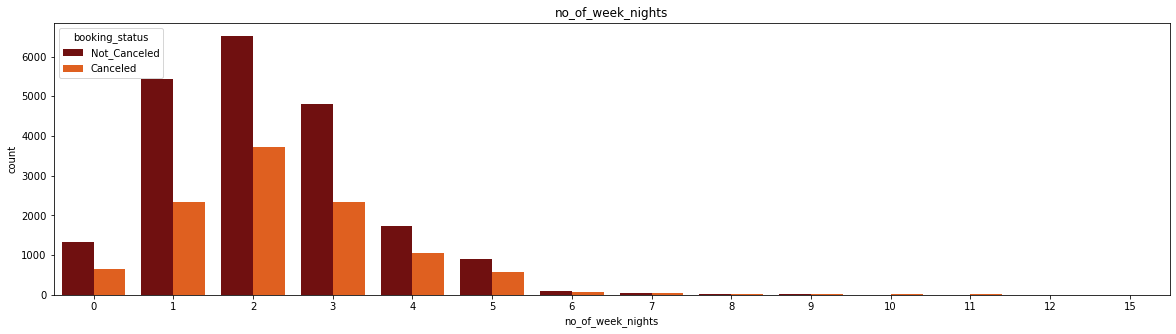

In [37]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_week_nights", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_week_nights")

# Count plot analysis of independent feature arrival_month

Text(0.5, 1.0, 'arrival_month')

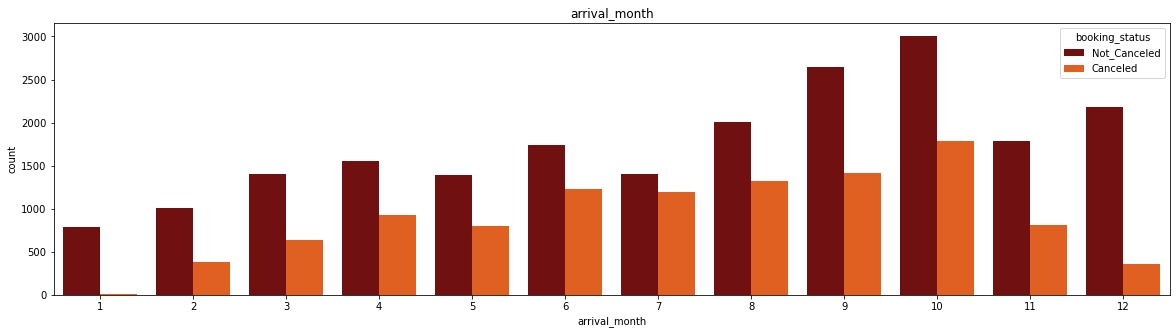

In [38]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="arrival_month", hue="booking_status", data=df, palette="gist_heat")
plt.title("arrival_month")

# Count plot analysis of independent feature arrival_year

Text(0.5, 1.0, 'arrival_year')

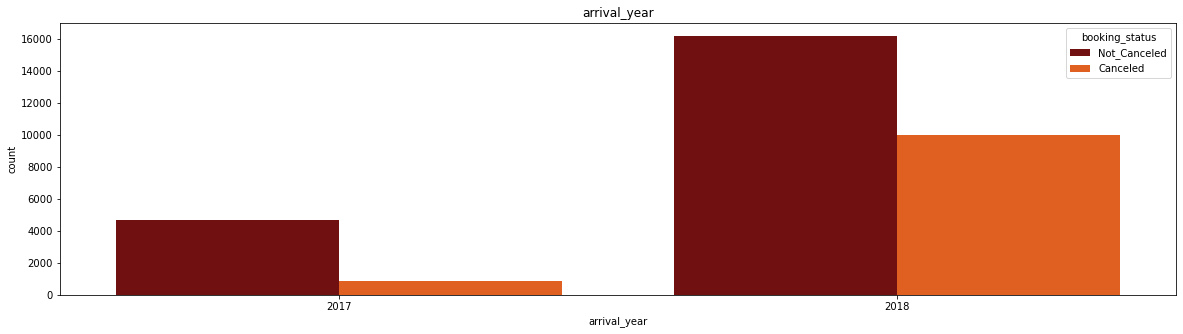

In [39]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="arrival_year", hue="booking_status", data=df, palette="gist_heat")
plt.title("arrival_year")

In [40]:
round(((df['arrival_year'].value_counts())/len(df))*100,2)

2018    82.42
2017    17.58
Name: arrival_year, dtype: float64

In [41]:
#here mostly booking was done in 2018 
df.drop(columns=['arrival_year'],inplace=True)

# percentage contribution of no_of_previous_cancellations

In [42]:
round(((df['no_of_previous_cancellations'].value_counts())/len(df))*100,2)

0     99.62
1      0.29
11     0.08
13     0.01
2      0.00
3      0.00
Name: no_of_previous_cancellations, dtype: float64

from here we get that 99% people did not cancel their bookings previously hence this column has nearly zero variance and hence we can drop this column

# Count plot analysis of independent feature no_of_previous_bookings_not_canceled

Text(0.5, 1.0, 'no_of_previous_bookings_not_canceled')

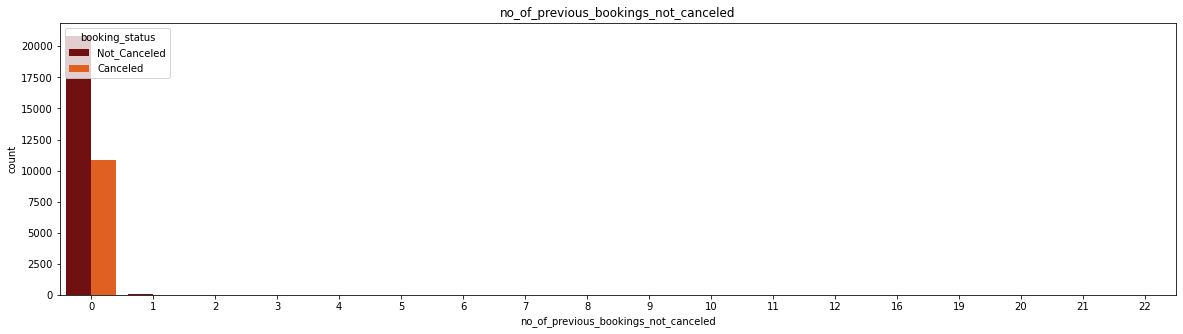

In [43]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_previous_bookings_not_canceled", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_previous_bookings_not_canceled")

lets drop columns no_of_previous_cancellations,no_of_previous_bookings_not_canceled as they dosent of variety in columns

In [44]:
df.drop(columns=['no_of_previous_cancellations','no_of_previous_bookings_not_canceled'],inplace=True)

# Count plot analysis of independent feature no_of_special_requests

Text(0.5, 1.0, 'no_of_special_requests')

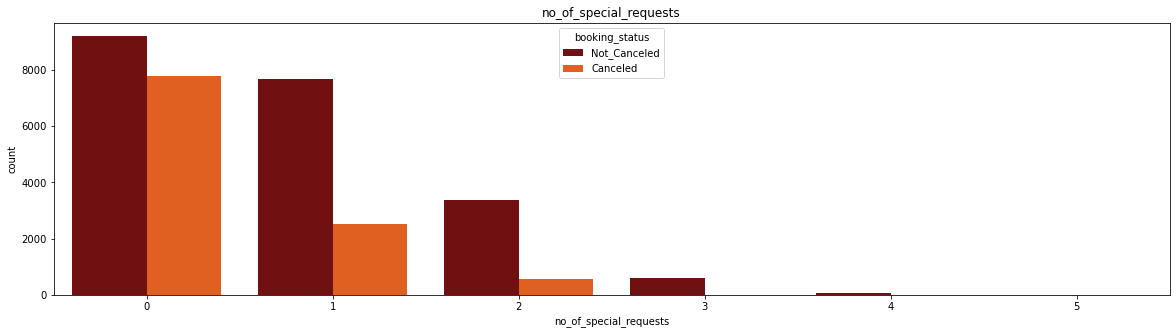

In [45]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_special_requests", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_special_requests")

most customers with special request 1,2,3 are not willing to cancel their bookings where as customers with special request 0 may or may not cancel their boooking

# Count plot analysis of independent feature required_car_parking_space

In [46]:
 round(((df['required_car_parking_space'].value_counts())/len(df))*100,2)

0    97.47
1     2.53
Name: required_car_parking_space, dtype: float64

Text(0.5, 1.0, 'required_car_parking_space')

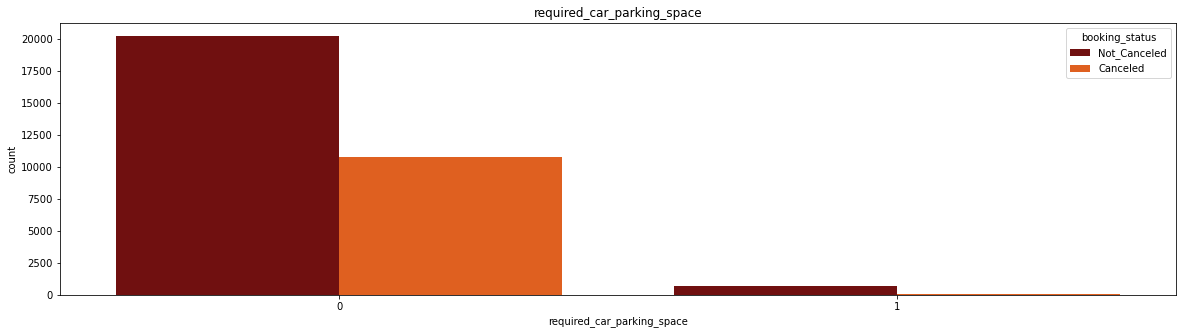

In [47]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="required_car_parking_space", hue="booking_status", data=df, palette="gist_heat")
plt.title("required_car_parking_space")

In [48]:
df.drop(columns=['required_car_parking_space'],inplace=True)

In [49]:
df.shape

(31787, 13)

In [50]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2,Meal Plan 1,Room_Type 1,224,10,2,Offline,65.00,0,Not_Canceled
1,2.0,0.0,2.0,3,Not Selected,Room_Type 1,5,11,6,Online,106.68,1,Not_Canceled


# 4-Lets check for categorcal values in independent features and target column

#Independent features such as 'type_of_meal_plan','room_type_reserved','market_segment_type','booking_status' are categorical in nature
#first we should convert it to numerical values As model dosent understand the categorical values

# Lets import one hot encoding from sk learn library and convert categorical features to numerical

In [51]:
from sklearn.preprocessing import OneHotEncoder 
#since here we have a problem of multicollinearity we will drop
ohe = OneHotEncoder(dtype=np.int32) #Initialising

In [52]:
df['type_of_meal_plan']=ohe.fit_transform(df[['type_of_meal_plan']]).toarray()
df['room_type_reserved']=ohe.fit_transform(df[['room_type_reserved']]).toarray()
df['market_segment_type']=ohe.fit_transform(df[['market_segment_type']]).toarray()
df['booking_status']=ohe.fit_transform(df[['booking_status']]).toarray()

# All the categorical values are converted to numerical value now we are good to go

In [53]:
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2,1,1,224,10,2,1,65.00,0,0
1,2.0,0.0,2.0,3,0,1,5,11,6,0,106.68,1,0
2,1.0,0.0,2.0,1,1,1,1,2,28,0,60.00,0,1
3,2.0,0.0,0.0,2,1,1,211,5,20,0,100.00,0,1
4,2.0,0.0,1.0,1,0,1,48,4,11,0,94.50,0,1
5,2.0,0.0,0.0,2,0,1,346,9,13,0,115.00,1,1
6,2.0,0.0,1.0,3,1,1,34,10,15,0,107.55,1,0
7,2.0,0.0,1.0,3,1,0,83,12,26,0,105.61,1,0
8,3.0,0.0,0.0,4,1,1,121,7,6,1,96.90,1,0
9,2.0,0.0,0.0,5,1,0,44,10,18,0,133.44,3,0


# 5- Lets check whether the data of target column is balanced or imbalanced

<AxesSubplot:xlabel='booking_status', ylabel='count'>

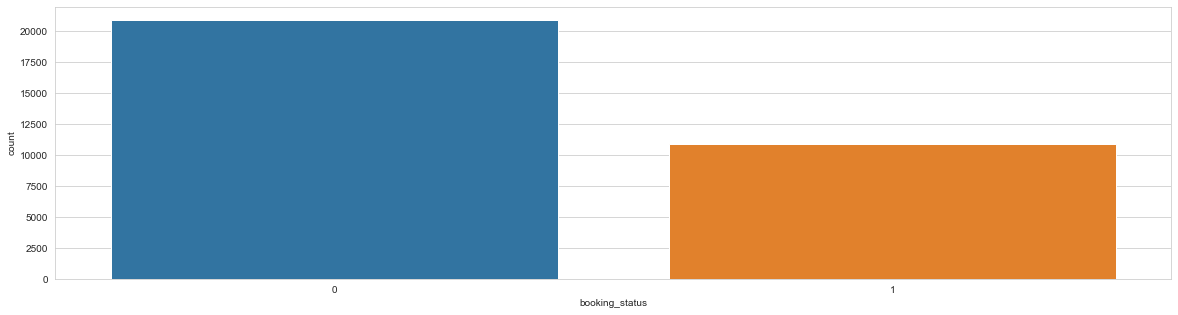

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status',data=df)

In [55]:
round(((df['booking_status'].value_counts())/len(df))*100,2)

0    65.79
1    34.21
Name: booking_status, dtype: float64

# we can see data is imbalanced hence lets try to balance it to overcome overfitting situations

# Lets use smote to balance data

In [56]:
from imblearn.over_sampling import SMOTE
# Separate input features and target
x = df.drop('booking_status',axis=1)
y = df['booking_status']
# setting up testing and training sets

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [57]:
x.shape

(41826, 12)

In [58]:
y.shape

(41826,)

In [59]:
y = pd.DataFrame(y, columns = ['booking_status'])
y['booking_status'].value_counts()

0    20913
1    20913
Name: booking_status, dtype: int64

In [60]:
df=pd.merge(x,y, left_index=True, right_index=True)
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2,1,1,224,10,2,1,65.00,0,0
1,2.0,0.0,2.0,3,0,1,5,11,6,0,106.68,1,0


<AxesSubplot:xlabel='booking_status', ylabel='count'>

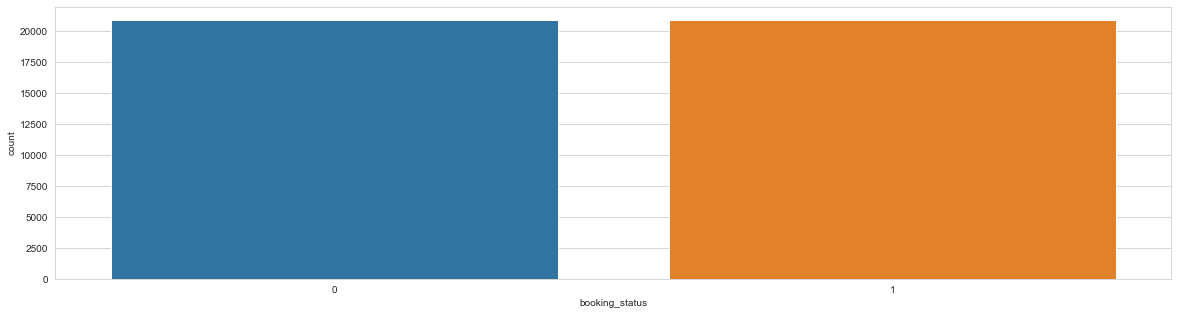

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status',data=df)

# now we have balanced the data for better analysis of the dataset

# 6-Lets check thd data statistics

In [62]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,41826.0,1.900099,0.472881,1.0,2.0,2.0,2.000000,3.0
no_of_children,41826.0,0.048447,0.213954,0.0,0.0,0.0,0.000000,2.0
no_of_weekend_nights,41826.0,0.836606,0.836953,0.0,0.0,1.0,1.844699,4.0
no_of_week_nights,41826.0,2.199087,1.316566,0.0,1.0,2.0,3.000000,15.0
type_of_meal_plan,41826.0,0.712093,0.452793,0.0,0.0,1.0,1.000000,1.0
room_type_reserved,41826.0,0.799861,0.400109,0.0,1.0,1.0,1.000000,1.0
lead_time,41826.0,103.765959,92.960370,0.0,28.0,76.0,161.000000,443.0
arrival_month,41826.0,7.386841,2.923168,1.0,5.0,8.0,10.000000,12.0
arrival_date,41826.0,15.553818,8.726374,1.0,8.0,16.0,23.000000,31.0
market_segment_type,41826.0,0.311170,0.462978,0.0,0.0,0.0,1.000000,1.0


In [63]:
#comparing mean and median we get to know there are outliers in the 'lead_time' and 'avg_price_per_room' columns lets trye to remove the outliers

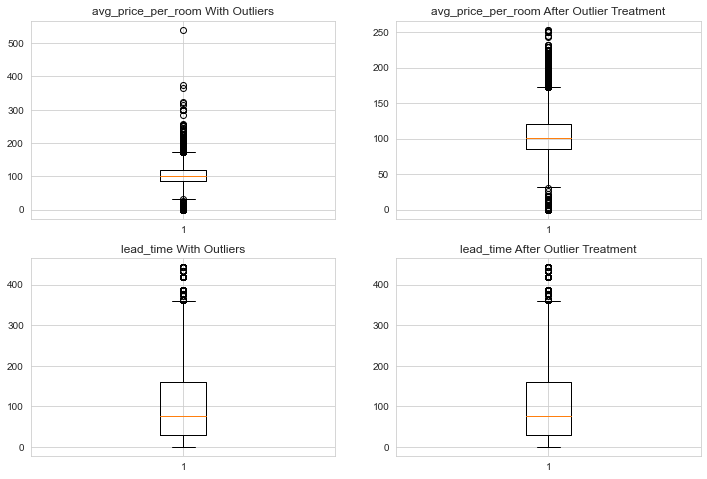

In [64]:
plt.figure(figsize=(12,8))
pc_cols=['avg_price_per_room','lead_time']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(2, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(df[var])
    Q1 = df[var].quantile(0.05)
    Q3 = df[var].quantile(0.90)
    IQR = Q3 - Q1
    df = df[(df[var] >= Q1 - 1.5*IQR) & (df[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(2, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(df[var])

# Lets  check the normal distribution of lead_time

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

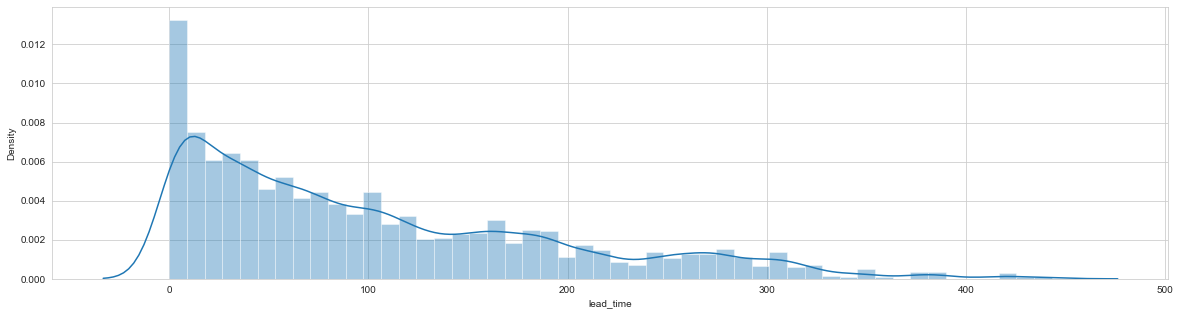

In [65]:
sns.distplot(df['lead_time'], label = 'lead_time')

In [66]:
df['lead_time'].kurtosis()

0.3274153194686509

In [67]:
df['lead_time'].skew()

1.0102480516458054

lead_time is highly positively skewed that is most of the lead_time is below average we need to correct this

In [68]:
df['lead_time'] =np.sqrt(df['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

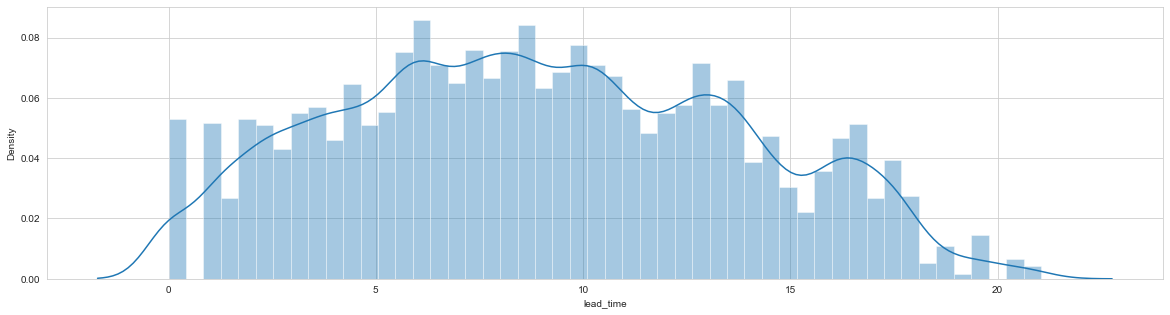

In [69]:
sns.distplot(df['lead_time'], label = 'lead_time')

# we have converted the column lead_time to nearly as a normal distribution curve

# Lets  check the normal distribution of avg_price_per_room

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

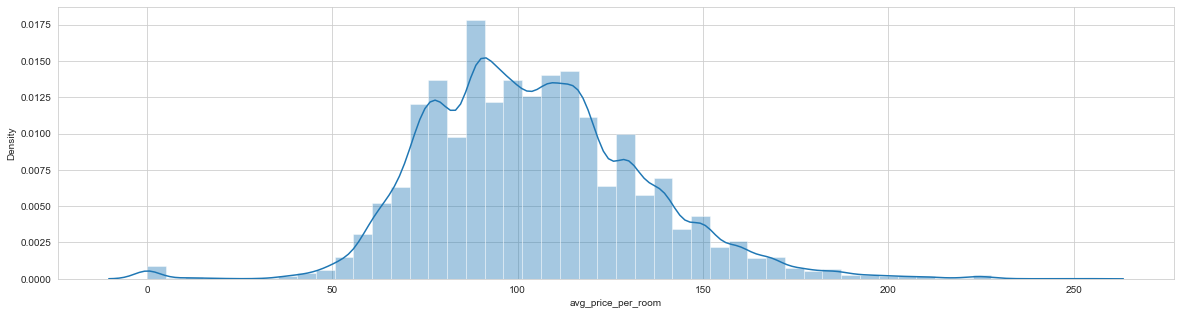

In [70]:
sns.distplot(df['avg_price_per_room'], label = 'avg_price_per_room')

In [71]:
df['avg_price_per_room'].kurt()

1.166378024146705

In [72]:
df['avg_price_per_room'].skew()

0.40059211323805505

In [73]:
df['avg_price_per_room']=np.sqrt(df['avg_price_per_room'])

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

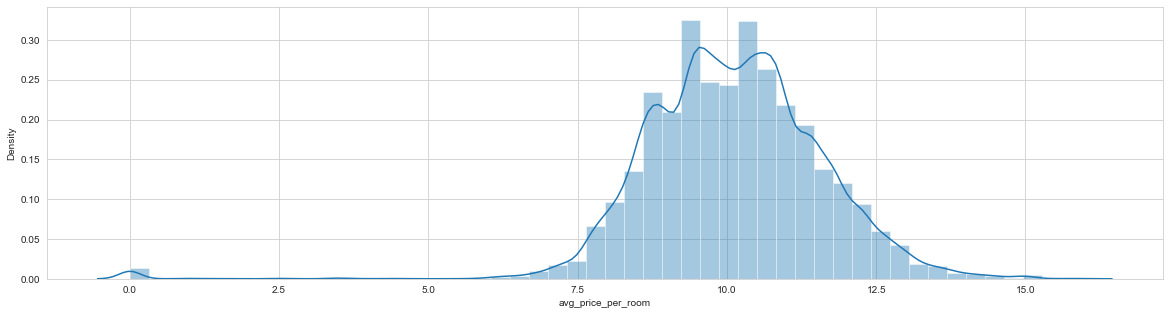

In [74]:
sns.distplot(df['avg_price_per_room'], label = 'avg_price_per_room')

In [75]:
len(df[df['avg_price_per_room']<7])

455

In [76]:
df=df[df['avg_price_per_room']>7]

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

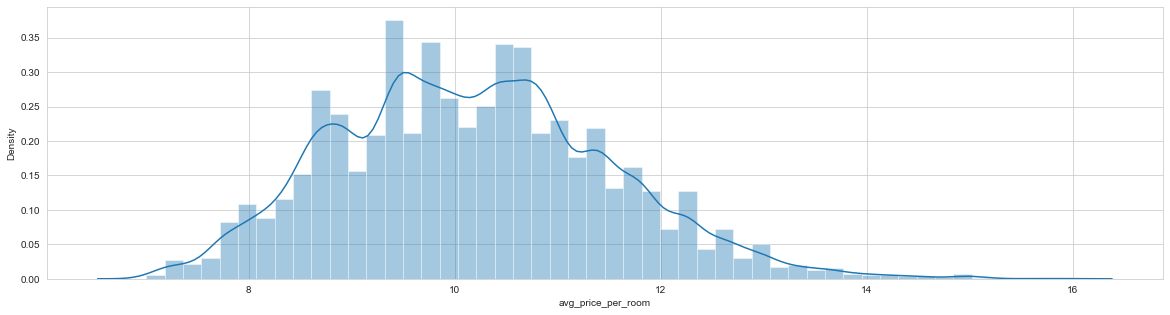

In [77]:
sns.distplot(df['avg_price_per_room'], label = 'avg_price_per_room')

# Now the distribution of avg_price_per_room looks fine

# 7-Lets check the correlation with the target column and independent features also among the independent features using heatmap

In [78]:
correlation = df.corr()
correlation['booking_status']

no_of_adults              0.055819
no_of_children           -0.009009
no_of_weekend_nights      0.037515
no_of_week_nights         0.011302
type_of_meal_plan        -0.095686
room_type_reserved       -0.042915
lead_time                 0.436472
arrival_month            -0.028619
arrival_date              0.005585
market_segment_type      -0.075078
avg_price_per_room        0.109327
no_of_special_requests   -0.348278
booking_status            1.000000
Name: booking_status, dtype: float64

<AxesSubplot:>

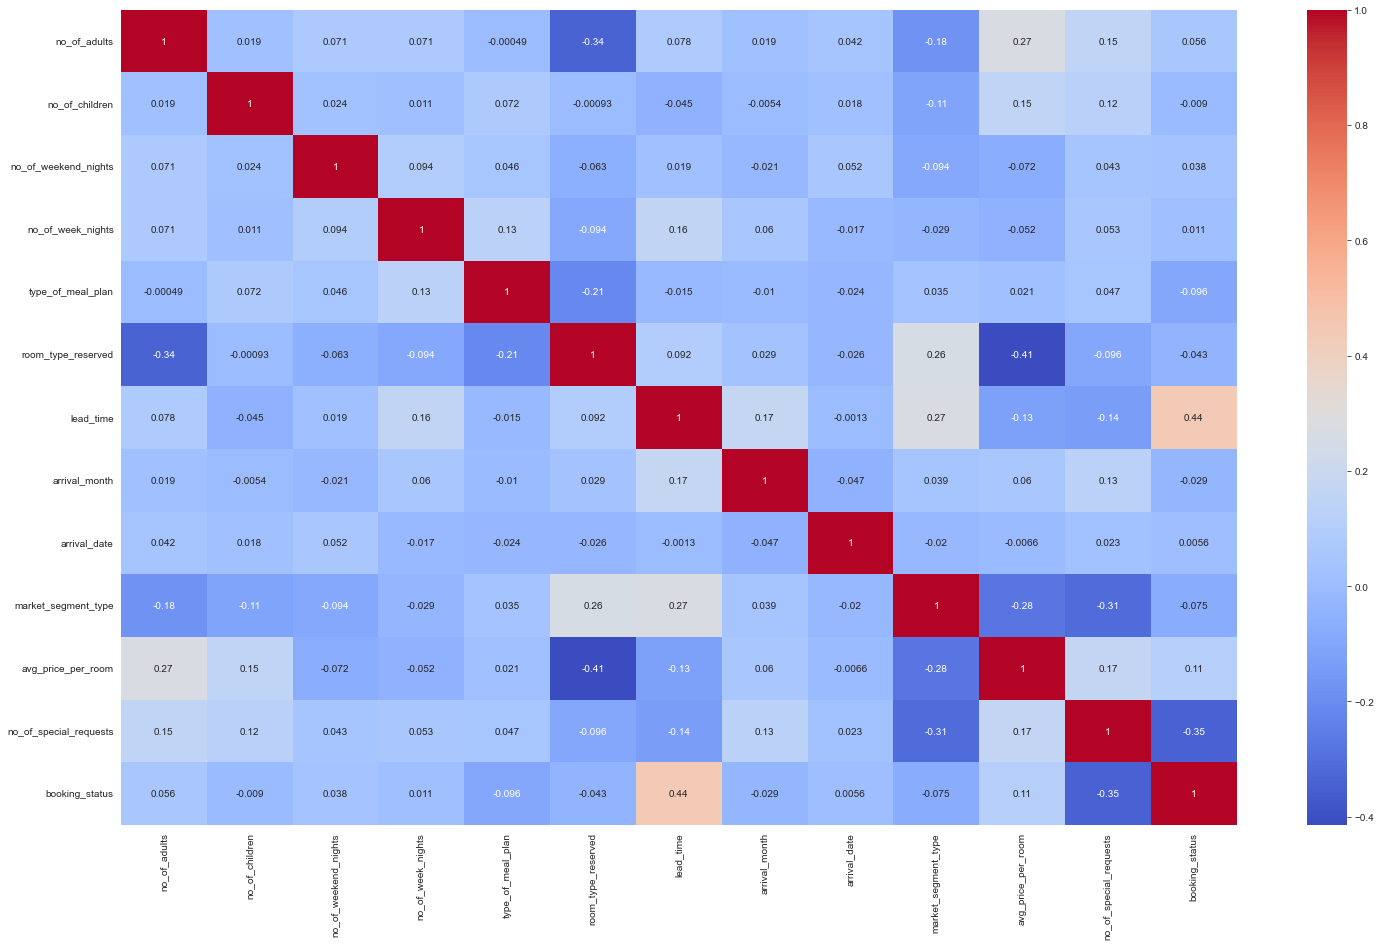

In [79]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation,yticklabels=True,cbar=True,annot=True,cmap='coolwarm')

as correlation among independent features looks fine we go ahead and build the model

In [80]:
df.shape

(41356, 13)

# Modelling

In [81]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

# test_train_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['booking_status'],axis=1), 
                                                    df['booking_status'], test_size=0.2, 
                                                    random_state=101)

In [83]:
print(x_train.shape)
print(x_test.shape)

(33084, 12)
(8272, 12)


In [84]:
x_test.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests
30101,2.0,0.0,0.0,3,1,1,6.633250,11,22,0,9.852411,1
31422,2.0,0.0,2.0,3,1,1,4.582576,9,3,0,10.246951,0


In [85]:
y_test.head(2)

30101    1
31422    0
Name: booking_status, dtype: int32

In [86]:
scaled = StandardScaler()

# Modelling with Logistic Regression

In [87]:
logmodel = LogisticRegression()

Lets create the Pipeline

In [88]:
pipe = make_pipeline(scaled,logmodel)

In [89]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [90]:
y_predicted = pipe.predict(x_test)

In [91]:
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [92]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4077
           1       0.78      0.80      0.79      4195

    accuracy                           0.78      8272
   macro avg       0.78      0.78      0.78      8272
weighted avg       0.78      0.78      0.78      8272



In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[3143,  934],
       [ 851, 3344]], dtype=int64)

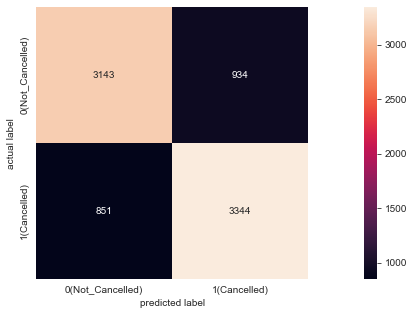

In [94]:
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True,fmt='d',  cbar=True,
                        xticklabels=['0(Not_Cancelled)', '1(Cancelled)'],
                        yticklabels=['0(Not_Cancelled)', '1(Cancelled)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [95]:
y_test.value_counts()

1    4195
0    4077
Name: booking_status, dtype: int64

In [96]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
x_predicted=pipe.predict(x_train)
print(y_predicted)
print(x_predicted)

[0 0 0 ... 1 1 1]
[1 1 0 ... 1 0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

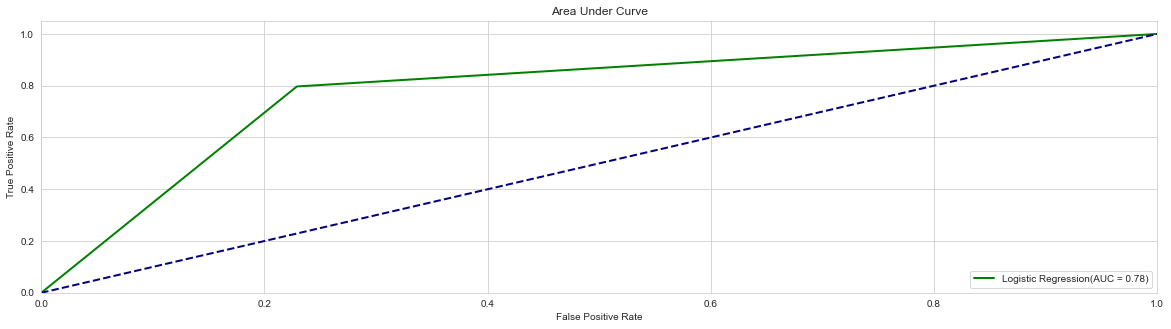

In [97]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show

In [98]:
print('accuracy socre of training data :',accuracy_score(y_train, x_predicted))
print('accuracy socre of testing data:',accuracy_score(y_test, y_predicted))
print('f1 score:',f1_score(y_test, y_predicted))
print('precision score:',precision_score(y_test, y_predicted))
print('recall score:',recall_score(y_test, y_predicted))

accuracy socre of training data : 0.7915306492564381
accuracy socre of testing data: 0.7842117988394585
f1 score: 0.7893308155316888
precision score: 0.7816736792893876
recall score: 0.797139451728248


# model check with decision tree

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,max_features=4,min_samples_leaf=25),n_estimators=200)
            


dt_classifier.fit(x_train,y_train)
pred_1 = dt_classifier.predict(x_train)
pred_2 = dt_classifier.predict(x_test)

print('classification report:\n\t',classification_report(pred_2,y_test))

classification report:
	               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4185
           1       0.86      0.89      0.87      4087

    accuracy                           0.87      8272
   macro avg       0.87      0.87      0.87      8272
weighted avg       0.87      0.87      0.87      8272



In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,pred_2)

array([[3607,  470],
       [ 578, 3617]], dtype=int64)

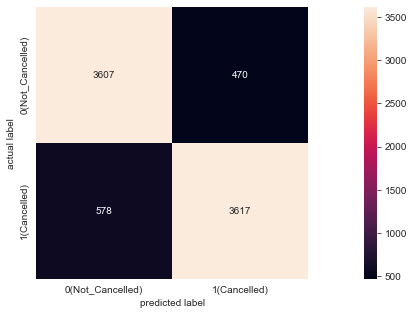

In [101]:
cnf_matrix = confusion_matrix(y_test,pred_2)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True,fmt='d',  cbar=True,
                        xticklabels=['0(Not_Cancelled)', '1(Cancelled)'],
                        yticklabels=['0(Not_Cancelled)', '1(Cancelled)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

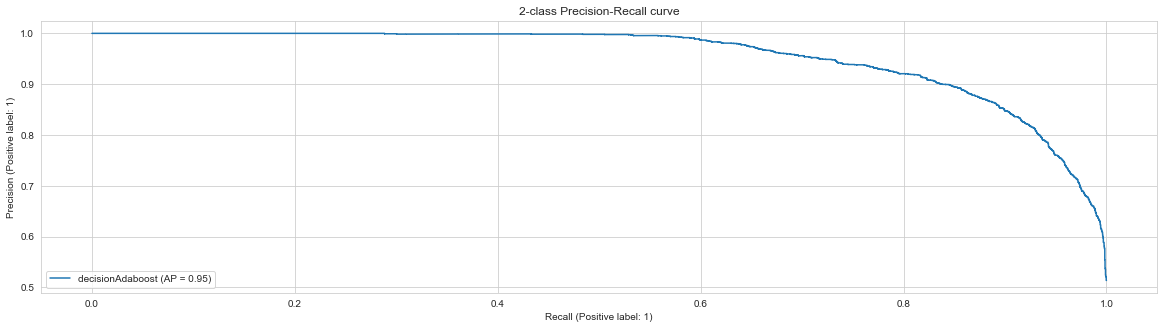

In [102]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    dt_classifier, x_test, y_test, name="decisionAdaboost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [103]:
print('accuracy socre of training data:',accuracy_score(y_train, pred_1))
print('accuracy socre of testing data:',accuracy_score(y_test, pred_2))
print('f1 score:',f1_score(y_test, pred_2))
print('precision score:',precision_score(y_test, pred_2))
print('recall score:',recall_score(y_test, pred_2))

accuracy socre of training data: 0.8851710796759763
accuracy socre of testing data: 0.8733075435203095
f1 score: 0.8734605167833857
precision score: 0.8850012233912405
recall score: 0.8622169249106079


# Modelling with Knn

In [104]:
knn= KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)
y_knn_test=knn.predict(x_test)
y_knn_train=knn.predict(x_train)

In [105]:
print('accuracy socre of training data:',accuracy_score(y_train,y_knn_train))
print('accuracy socre of testing data:',accuracy_score(y_test,y_knn_test))
print('f1 score:',f1_score(y_test, y_knn_test))
print('precision score:',precision_score(y_test,y_knn_test))
print('recall score:',recall_score(y_test,y_knn_test))

accuracy socre of training data: 0.8657659291500424
accuracy socre of testing data: 0.8371615087040619
f1 score: 0.8425482174167153
precision score: 0.826605504587156
recall score: 0.8591179976162098


# Modelling with Gradient Boost

In [106]:
gbm = GradientBoostingClassifier().fit(x_train,y_train)
y_gbm_test=gbm.predict(x_test)
y_gbm_train=gbm.predict(x_train)

In [107]:
print('accuracy socre of training data:',accuracy_score(y_train,y_gbm_train))
print('accuracy socre of testing data:',accuracy_score(y_test,y_gbm_test))
print('f1 score:',f1_score(y_test, y_gbm_test))
print('precision score:',precision_score(y_test,y_gbm_test))
print('recall score:',recall_score(y_test,y_gbm_test))

accuracy socre of training data: 0.8626828678515295
accuracy socre of testing data: 0.8557785299806576
f1 score: 0.856868626274745
precision score: 0.8625603864734299
recall score: 0.8512514898688915


In [108]:
import xgboost as xgb
xg_model = xgb.XGBClassifier(random_state=1,
                             learning_rate=0.01)
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [109]:
pred_train = xg_model.predict(x_train)
pred_test = xg_model.predict(x_test)

In [110]:
print('accuracy socre of training data:',accuracy_score(y_train,pred_train))
print('accuracy socre of testing data:',accuracy_score(y_test,pred_test))
print('f1 score:',f1_score(y_test, pred_test))
print('precision score:',precision_score(y_test,pred_test))
print('recall score:',recall_score(y_test,pred_test))

accuracy socre of training data: 0.8593579978237215
accuracy socre of testing data: 0.8552949709864603
f1 score: 0.8554871423397321
precision score: 0.8666829745596869
recall score: 0.8445768772348033


# Modelling with Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, max_features=4,
                                                      min_samples_leaf=25)


RF_classifier.fit(x_train,y_train)
pred_1 = dt_classifier.predict(x_train)
pred_2 = dt_classifier.predict(x_test)

print('classification report:\n\t',classification_report(pred_2,y_test))

classification report:
	               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4185
           1       0.86      0.89      0.87      4087

    accuracy                           0.87      8272
   macro avg       0.87      0.87      0.87      8272
weighted avg       0.87      0.87      0.87      8272



In [112]:
print('accuracy socre of training data:',accuracy_score(y_train, pred_1))
print('accuracy socre of testing data:',accuracy_score(y_test, pred_2))
print('f1 score:',f1_score(y_test, pred_2))
print('precision score:',precision_score(y_test, pred_2))
print('recall score:',recall_score(y_test, pred_2))

accuracy socre of training data: 0.8851710796759763
accuracy socre of testing data: 0.8733075435203095
f1 score: 0.8734605167833857
precision score: 0.8850012233912405
recall score: 0.8622169249106079
